In [46]:
#Data Preparation
#We will now import some required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import auc, accuracy_score, roc_auc_score

#Loading the dataset
dataset = pd.read_csv('bank-additional-full.csv',delimiter=";")
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [47]:
#dataset.describe()

In [48]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [49]:
#check for null values
#dataset.isnull().values.any()

### Categorical Analysis

In [6]:
# Exploratory Data Analysis (EDA) of features
#sns.countplot(x='y', data=dataset)

In [7]:
#Job
#sns.catplot(x='y', col='job', kind='count', data=dataset)

In [8]:
#marital
#sns.catplot(x='y', col='marital', kind='count', data=dataset)
#sns.countplot(data=dataset,x = 'marital',hue = 'y')

In [9]:
#education
#sns.catplot(x='y', col='education', kind='count', data=dataset)

In [10]:
#default
#sns.catplot(x='y', col='default', kind='count', data=dataset)
#sns.countplot(data=dataset,x = 'default',hue = 'y')

In [11]:
#housing
#sns.catplot(x='y', col='housing', kind='count', data=dataset)

In [12]:
#loan
#sns.catplot(x='y', col='loan', kind='count', data=dataset)

In [13]:
#contact
#sns.catplot(x='y', col='contact', kind='count', data=dataset)

In [14]:
#month
#sns.catplot(x='y', col='month', kind='count', data=dataset)

In [15]:
#day_of_week
#sns.catplot(x='y', col='day_of_week', kind='count', data=dataset)

In [16]:
#poutcome
#sns.catplot(x='y', col='poutcome', kind='count', data=dataset)

### Quantitative Analysis

In [17]:
#dataset_drop = dataset.dropna()
#sns.distplot(dataset_drop.age, kde=False);

In [18]:
# univariate analysis
#sns.stripplot(x='y', y='age', data=dataset, alpha=0.3, jitter=True);

In [19]:
#sns.stripplot(x='y', y='duration', data=dataset, alpha=0.3, jitter=True)

In [20]:
#sns.stripplot(x='y', y='campaign', data=dataset, alpha=0.3, jitter=True)

In [21]:
#sns.stripplot(x='y', y='pdays', data=dataset, alpha=0.3, jitter=True)

In [22]:
#sns.stripplot(x='y', y='previous', data=dataset, alpha=0.3, jitter=True)

In [23]:
#matrix of axes, shows the relationship between every pair of columns in the dataframe.
#sns.pairplot(dataset_drop, hue='y')

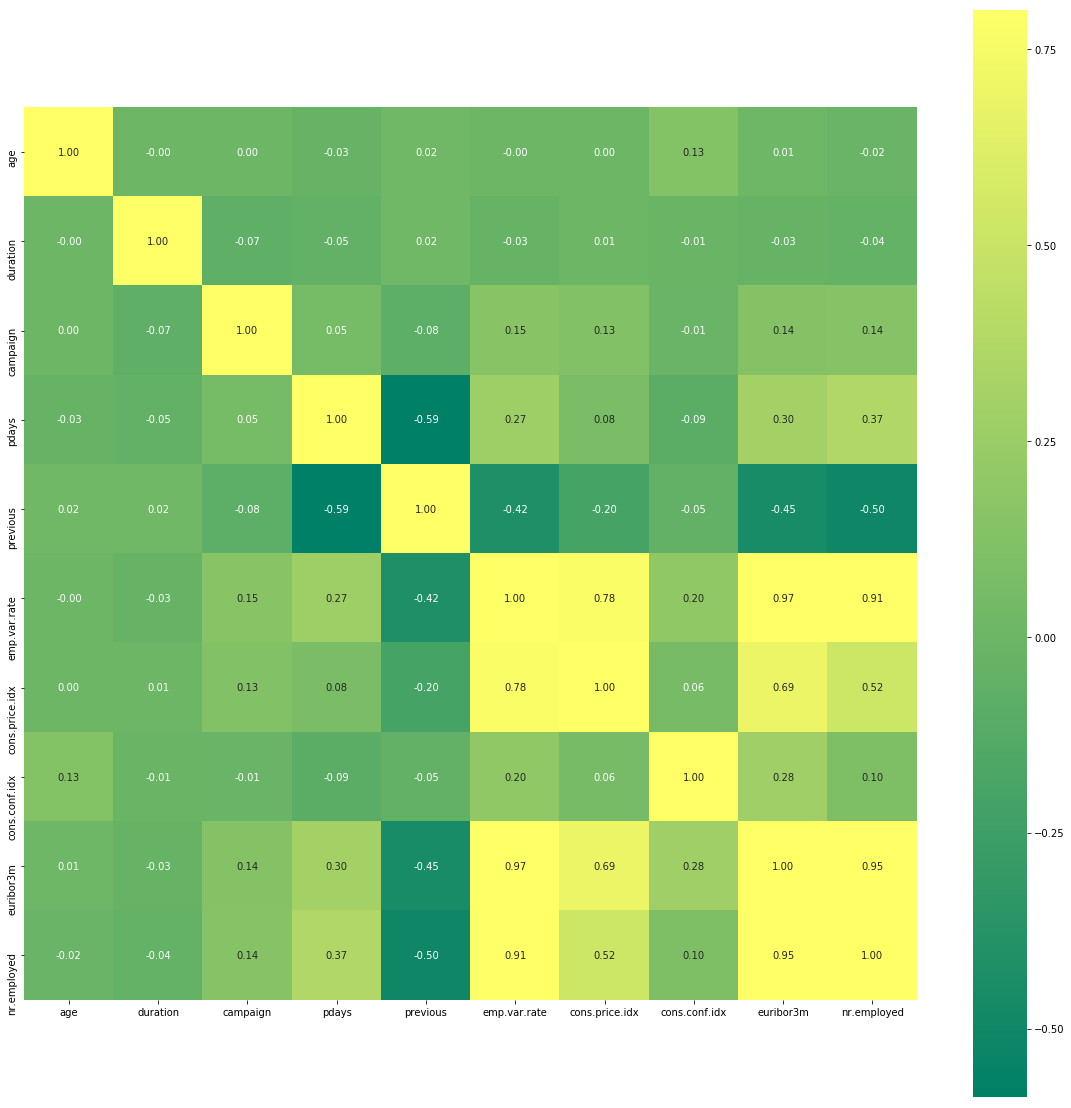

In [45]:
corrmat = dataset.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, fmt='.2f', cmap = "summer")
plt.show()

In [50]:
# splitting data
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [88]:
#Encode catagorical features in column 1-9 and 14
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
for i in range(1,10):
    X[:,i] = labelencoder_X.fit_transform(X[:,i])
X[:,14] = labelencoder_X.fit_transform(X[:,14])

onehotencoder = OneHotEncoder(categorical_features=[1,2,3,4,5,6,7,8,9,14])
X = onehotencoder.fit_transform(X).toarray()

labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

C:\Users\barba\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\barba\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [78]:
X.shape

(41188, 66)

In [72]:
#Backward Elimination reduced score from 91.85 to 89.16
#Backward Elimination
#import statsmodels.formula.api as sm
# adding column of ones for y-intercept *scikit does this for you, prefer to keep col in front
# append X onto array of ones
#X = np.append(arr=np.ones((41188,1)).astype(int), values=X, axis=1)
#note automatic backwared elimination
#def backwardElimination(x, sl):
#    numVars= len(x[0])
#    for i in range(0, numVars):
#        obj_OLS= sm.OLS(y, x).fit()
#        maxVar= max(obj_OLS.pvalues).astype(float)
#        if maxVar> sl:
#            for j in range(0, numVars-i):
#                if (obj_OLS.pvalues[j].astype(float) == maxVar):
#                    x = np.delete(x, j, 1)
#    obj_OLS.summary()
#    return x
#SL = 0.05
#X_sig=X[:,[0,63]]
#X_Modeled = backwardElimination(X_sig,SL)

In [79]:
#Splitting the data into Training Set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=0)

#Normalizing the features
from sklearn.preprocessing import StandardScaler
#instantiate the standard scalar (make a StandardScaler object)
sc_X= StandardScaler()
# pass to object X_train, compute mean and std for each value in data set
# fit yourself to this, transform and save to X_train, fit computes mean/std
X_train= sc_X.fit_transform(X_train)
#don't fit on test set, only have one sample at a time, don't have all instances that it
#will see over lifetime of model
X_test= sc_X.transform(X_test)
#print(X_test)

In [80]:
#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
from sklearn.tree import DecisionTreeClassifier
#improved acc from 89 to 90 adding max_depth
classifierObj= DecisionTreeClassifier(criterion='entropy', max_depth=5)
classifierObj.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [81]:
#Making predictions on the Test Set
y_pred= classifierObj.predict(X_test)

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[7049  270]
 [ 401  518]]


In [82]:
score = classifierObj.score(X_test, y_test)
print(score)

0.91854819130857


In [83]:
y_pred= classifierObj.predict(X_test)
print('The accuracy of prediction is:', accuracy_score(y_test, y_pred))
print('The roc_auc_score of prediction is:', roc_auc_score(y_test, y_pred))
print('The null acccuracy is:', max(y_test.mean(), 1 - y_test.mean()))

The accuracy of prediction is: 0.91854819130857
The roc_auc_score of prediction is: 0.7633829312144029
The null acccuracy is: 0.888443797038116


In [32]:
# Model Accuracy, how often is the classifier correct?
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9038601602330663


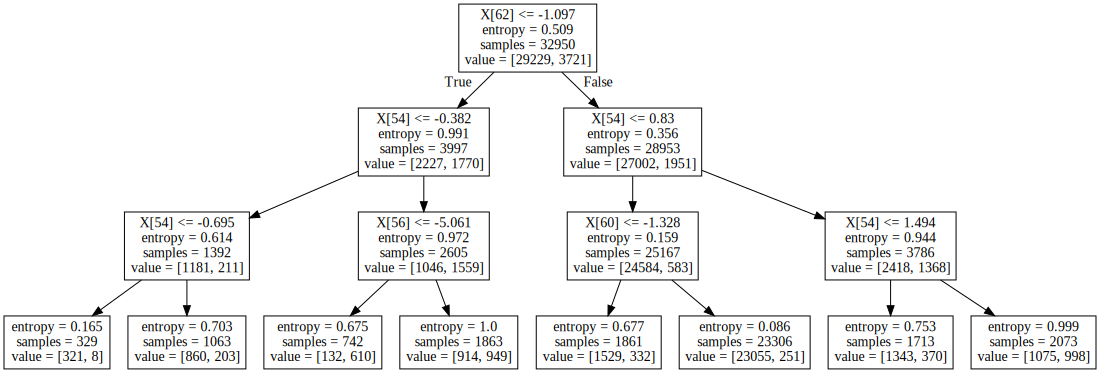

In [44]:
from graphviz import Source
from sklearn import tree
Source( tree.export_graphviz(classifierObj, out_file=None))
graph = Source( tree.export_graphviz(classifierObj, out_file=None))
graph.format = 'png'
graph.render('dtree_render',view=True)
from IPython.display import SVG
graph = Source( tree.export_graphviz(classifierObj, out_file=None))
SVG(graph.pipe(format='svg'))

### Summary
Features / Max_tree Depth / Score <br>
all / 3 / 90.39<br>
all / 5 / 91.85<br>
all / 10 / 90.38<br>